In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import keras
import PIL
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir('drive/MyDrive/AnyaGreeneResearch/ImageNet')

In [15]:
img = 'ILSVRC2012_test_00006812.JPEG'
imageFolder = 'drive/MyDrive/AnyaGreeneResearch/ImageNet/'
pic = PIL.Image.open(imageFolder + img)

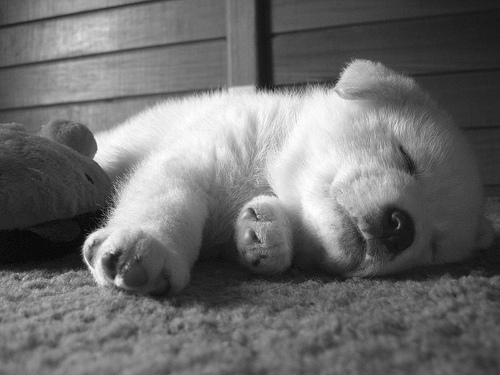

In [16]:
pic

In [21]:
pic2 = pic.convert("RGB").resize((200,200))

In [26]:
pic2
array = np.array(pic2)
narray = (array - np.mean(array))/np.std(array)

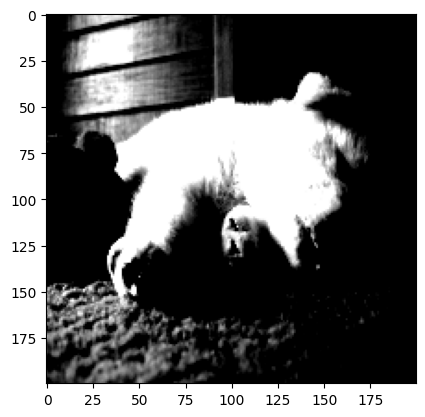

In [28]:
plt.imshow(narray)

In [30]:
np.save('drive/MyDrive/AnyaGreeneResearch/cutePuppy.npy',narray) #can't actually convert back to puppy in drive

In [ ]:
# import tarfile

# # open file
# file = tarfile.open('drive/MyDrive/AnyaGreeneResearch/minc-2500.tar.gz')

# # extracting file
# file.extractall('drive/MyDrive/AnyaGreeneResearch/MINC')

# file.close()

In [ ]:
files = os.listdir('drive/MyDrive/AnyaGreeneResearch/ImageNet')

In [ ]:
vgg = tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

553467096/553467096 [==============================] - 6s 0us/step


In [ ]:
res = tf.keras.applications.resnet50.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,

)

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
from datasets import load_dataset
ds = load_dataset("imagenet-1k")
train_ds = ds["train"]
train_ds[0]["image"]  # a PIL Image

KeyboardInterrupt: ignored

In [ ]:
ds

NameError: ignored

[0]


(<matplotlib.image.AxesImage at 0x7f3a644ee200>, None)

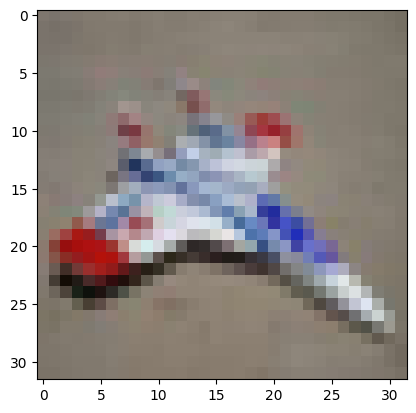

In [ ]:
plt.imshow(x_train[30]), print(y_train[30])

In [ ]:
cats = '''
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
'''

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [32]:
def model1(reg):
  return keras.Sequential([
  keras.layers.Conv2D(input_shape=(32,32,3), filters=8, kernel_size=3,
                      strides=1, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  keras.layers.Conv2D(filters=8, kernel_size=3,
                      strides=1, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                      strides=(1,1)),
  keras.layers.Flatten(),
  keras.layers.Dense(30,kernel_regularizer=tf.keras.regularizers.L2(reg)),
  keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.L2(reg)),
])
def model2(reg):
  return keras.Sequential([
  keras.layers.Conv2D(input_shape=(32,32,3), filters=8, kernel_size=3,
                      strides=1, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  keras.layers.Conv2D(filters=5, kernel_size=5,
                      strides=1, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                      strides=(1,1)),
  tf.keras.layers.BatchNormalization(),
  keras.layers.Conv2D(filters=8, kernel_size=3,
                      strides=1, activation='relu'),

  keras.layers.Flatten(),
  keras.layers.Dense(53,kernel_regularizer=tf.keras.regularizers.L2(reg)),
  keras.layers.Dense(29,kernel_regularizer=tf.keras.regularizers.L2(reg)),
  keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.L2(reg)),
])

In [36]:
Results = 'drive/MyDrive/AnyaGreeneResearch/Results/'
dictionary = {}
epochs = 3
models = ["model1", "model2"]
for Ntr in [20, 50, 100]:
  for reg in [1,1e-1,1e-2]:
    for lr in [0.001, 0.0001]:
      ## https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
      for modelName in models:
        if modelName == "model1":
          model = model1(reg)
        elif modelName == "model2":
          model = model2(reg)
        model.summary()
        model.compile(optimizer = tf.keras.optimizers.Adam(lr),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])
        print('\n\nMODEL\n\nreg ='+str(reg)+' lr ='+str(lr))
        h = model.fit(x_train[0:Ntr], y_train[0:Ntr], epochs=epochs, validation_data=(x_train[Ntr:Ntr+1000],y_train[Ntr:Ntr+1000]))
        pd.DataFrame(h.history).to_csv(Results+str(n)+"_"+str(reg)+"_"+str(lr)+"_"+modelName+".csv")

        #dictionary[(reg, lr)] = (accuracy)

      ## REMOVE THIS FOR ACTUAL EXPERIMENTS
      # plt.plot(dictionary[(reg,lr)]['loss'])
      # plt.plot(dictionary[(reg,lr)]['val_loss'])
      # plt.legend(['training loss', 'val loss'])
      # plt.title('this')
      # plt.xlabel('moo')
      # plt.ylabel('quack')
      # plt.show()
      ##


      # test_loss, test_acc = model.evaluate(test_images, test_labels)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 30, 30, 8)         224       
                                                                 
 batch_normalization_41 (Bat  (None, 30, 30, 8)        32        
 chNormalization)                                                
                                                                 
 conv2d_70 (Conv2D)          (None, 28, 28, 8)         584       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 27, 27, 8)        0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 5832)              0         
                                                                 
 dense_67 (Dense)            (None, 30)              

Text(0, 0.5, 'quack')

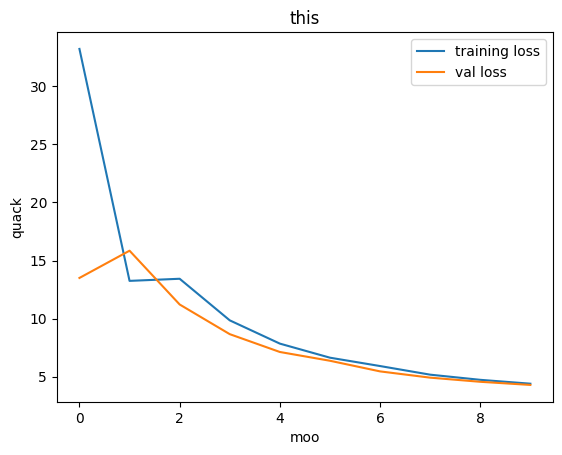

In [ ]:
plt.plot(dictionary[(1,.001)]['loss'])
plt.plot(dictionary[(1,.001)]['val_loss'])
plt.legend(['training loss', 'val loss'])
plt.title('this')
plt.xlabel('moo')
plt.ylabel('quack')

Text(0, 0.5, 'quack')

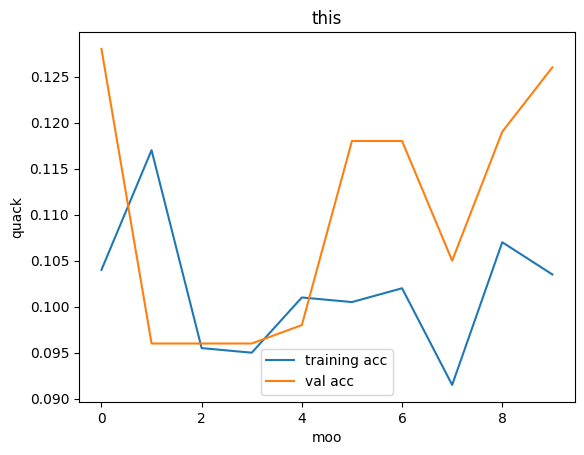

In [ ]:
plt.plot(dictionary[(1,.001)]['accuracy'])
plt.plot(dictionary[(1,.001)]['val_accuracy'])
plt.legend(['training acc', 'val acc'])
plt.title('this')
plt.xlabel('moo')
plt.ylabel('quack')

In [ ]:
map = {}
map[3] = 5
map["Anya"] = 7

In [ ]:
map["Anya"]

7

In [ ]:
dictionary

{(1, 0.001): 0.20600000023841858,
 (1, 0.0001): 0.2329999953508377,
 (1, 1e-05): 0.19200000166893005,
 (0.1, 0.001): 0.1850000023841858,
 (0.1, 0.0001): 0.2370000034570694,
 (0.1, 1e-05): 0.17499999701976776,
 (0.01, 0.001): 0.20100000500679016,
 (0.01, 0.0001): 0.24799999594688416,
 (0.01, 1e-05): 0.14399999380111694,
 (0.001, 0.001): 0.17100000381469727,
 (0.001, 0.0001): 0.23999999463558197,
 (0.001, 1e-05): 0.1979999989271164}

In [ ]:
from keras.applications.vgg16 import VGG16
model = keras.models.Sequential()
model.add(VGG16(weights = "imagenet"))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
_________________________________________________________________


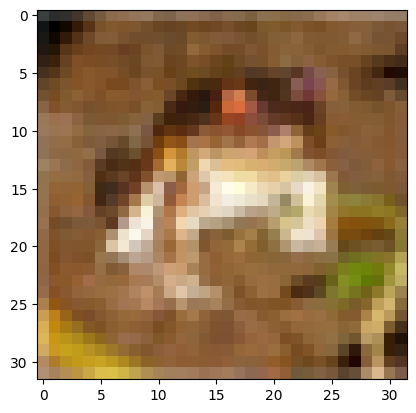

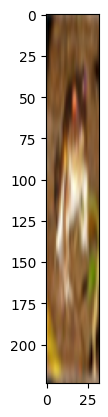

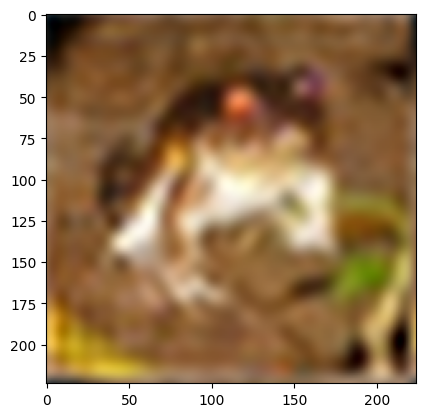

In [ ]:
#rounding numbers to resize
import scipy
resample = scipy.signal.resample(x_train[0], 224)
plt.imshow(x_train[0])
plt.show()
plt.imshow(np.round(resample.astype(int)))
resampley = scipy.signal.resample(resample, 224, axis = 1)
plt.show()
plt.imshow(resampley.astype(int))

In [ ]:
resample[1]

array([[ 43.73529836,  49.62885879,  52.75760313],
       [ 27.34027063,  33.26857227,  34.28816774],
       [ 35.22615041,  35.18770881,  32.55862717],
       [ 55.12355547,  42.0608016 ,  33.61553922],
       [ 87.27535348,  61.29556645,  44.51073303],
       [110.10639542,  80.49770694,  57.25117274],
       [130.34452281,  96.54829041,  69.44965908],
       [137.12304802, 100.14126462,  74.75141703],
       [142.82722267, 109.01982515,  84.08940604],
       [142.20301597, 112.12746498,  86.41676424],
       [124.07926944,  95.32518703,  69.44369904],
       [118.08984903,  91.37403016,  67.75032437],
       [135.58934277, 107.82330367,  83.06686568],
       [138.62555897, 105.81260533,  78.4057466 ],
       [132.00062654,  99.2817679 ,  71.94202307],
       [123.261706  ,  90.34741435,  63.37495643],
       [131.87559689,  99.7676522 ,  71.96161475],
       [128.92242239,  99.84574206,  68.15870917],
       [120.14129472,  92.66942395,  57.06632197],
       [136.65087008, 110.70635

In [ ]:
# divide by largest number to get decimal
def resize(img):
  resample = scipy.signal.resample(img, 224)
  #plt.imshow(img)
  #plt.show()
  #plt.imshow((resample/255))
  resampley = scipy.signal.resample(resample, 224, axis = 1)
  #plt.show()
  #plt.imshow(resampley/255)
  return resampley

In [ ]:
X_resize = []
for i in range(200):
  new_x = resize(x_train[i])
  X_resize.append(new_x)

In [ ]:
arrResize = np.asarray(X_resize)
model.compile(optimizer = tf.keras.optimizers.Adam(lr),
          loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
          metrics=[keras.metrics.CategoricalAccuracy()])
guess = model.predict(arrResize)


7/7 [==============================] - 147s 20s/step


In [ ]:
run = np.argmax(guess,axis = 1)

In [ ]:
run

array([680, 675, 726, 283, 675, 728, 168, 268, 726, 708, 167, 167, 268,
       782, 635, 675, 675, 680, 615, 729, 763, 902, 712, 126,  47, 838,
       680, 680, 126, 596, 584, 675, 675, 729, 268, 772, 631, 339, 534,
       335, 782, 596, 168, 680, 653, 782, 901,  80, 167, 473, 522, 680,
       167, 473, 111, 335, 680, 680, 111, 551, 675, 675, 838, 782, 675,
       680, 838, 675, 167, 499, 623, 482, 126, 680, 262, 680, 675, 723,
       680, 675, 680, 379, 885, 556, 590, 680, 210, 341, 675, 339, 635,
       680, 838, 831, 856, 680, 891,  47, 885, 584, 534, 604, 686, 584,
        47, 491, 729, 680, 499, 838, 795, 675, 795, 335, 772, 499, 675,
       885, 831, 482, 111, 885, 729, 392, 680, 117, 675, 499, 789, 551,
       680, 181, 680, 101, 481, 838, 856, 675, 499, 499, 772, 680, 556,
       109, 680, 680, 857, 510, 680, 386, 729, 782, 556, 351, 680, 729,
       262, 729, 272, 585, 686, 914, 729, 680, 969, 623, 680, 906, 675,
       465, 534, 708, 676, 906, 551, 274, 680, 200, 680, 813, 14

In [ ]:
np.squeeze(y_train[0:200])

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3,
       6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7,
       1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1,
       4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7,
       9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9,
       9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7,
       6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4,
       6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4,
       1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3,
       5, 0], dtype=uint8)